## Determination of a prospective tariff for a telecom company

Megaline is a federal mobile operator. The company offers customers two tariff plans: "Smart" and "Ultra". To adjust the advertising budget, the commercial department wants to understand which tariff brings in more money. It is necessary to make a preliminary analysis of tariffs on a small sample of customers. It is necessary to analyze the behavior of customers and draw a conclusion - which tariff is better.

Initial data: The data contains information about 500 Megaline users for 2018.

Tariff "Smart"

Monthly fee: 550 rubles Includes 500 minutes of calls, 50 messages and 15 GB of Internet traffic. Cost of services in excess of the tariff package: 1. minute of conversation: 3 rubles ("Megaline" always rounds up the values of minutes and megabytes. If the user spoke only 1 second, a whole minute is counted in the tariff); 2. message: 3 rubles; 3. 1 GB of Internet traffic: 200 rubles.

Tariff "Ultra"

Monthly fee: 1950 rubles Includes 3000 minutes of conversation, 1000 messages and 30 GB of Internet traffic Cost of services in excess of the tariff package: 1 minute of conversation: 1 ruble; 2. message: 1 ruble; 3. 1 GB of Internet traffic: 150 rubles.

**The purpose of the study** is to test the hypotheses:

1. The average revenue of users of the Ultra and Smart tariffs differ
2. The average revenue of users from Moscow differs from the revenue of users from other regions.


**Research progress:**

1. Data review.
2. Data preprocessing.
3. Hypothesis testing. conclusion for each hypothesis.
4. General conclusion.

In [1]:
pip install jupyter_contrib_nbextensions 

In [2]:
conda install --yes -c conda-forget jupyter_conrib_nbextensions


Note: you may need to restart the kernel to use updated packages.



UnavailableInvalidChannel: The channel is not accessible or is invalid.
  channel name: conda-forget
  channel url: https://conda.anaconda.org/conda-forget
  error code: 404

You will need to adjust your conda configuration to proceed.
Use `conda config --show channels` to view your configuration's current state,
and use `conda config --show-sources` to view config file locations.




In [3]:
!jupyter nbextension enable toc2/main

Enabling notebook extension toc2/main...
      - Validating: ok


In [99]:
import warnings

warnings.filterwarnings('ignore')

### Step 1. Preliminary output of data and consolidation into one dataframe.

In [4]:
import pandas as pd
from scipy import stats as st
import numpy as np
import datetime as dt
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import math

In [5]:
df_calls = pd.read_csv(r'C:\Users\Vadim\Documents\Datasets\calls.csv')
df_internet = pd.read_csv(r'C:\Users\Vadim\Documents\Datasets\internet.csv')
df_messages = pd.read_csv(r'C:\Users\Vadim\Documents\Datasets\messages.csv')
df_tariffs = pd.read_csv(r'C:\Users\Vadim\Documents\Datasets\tariffs.csv')
df_users = pd.read_csv(r'C:\Users\Vadim\Documents\Datasets\users.csv')

In [6]:
tab_dict = [df_calls,df_internet, df_messages, df_tariffs, df_users]

for table in tab_dict:
    print("===============================")
    display(table.info())
    display(table.describe())
    display(table.head())
    print("Количество дубликатов:", table.duplicated().sum())
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Количество дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Количество дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Количество дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Количество дубликатов: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Количество дубликатов: 0


**Conclusions**

Tables contain such data types as int64, float and object. There are no duplicates in the tables. Gaps occur only in the last table `df_users`.

### Step 2. Data preprocessing

#### Checking data for errors

In [7]:
df_users_calls = df_calls.set_index('user_id').join(df_users.set_index('user_id'))

In [8]:
df_users_calls.head(5)

,id,call_date,duration,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,,,,
1000,1000_0,2018-07-25,0.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,1000_1,2018-08-17,0.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,1000_2,2018-06-11,2.85,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,1000_3,2018-09-21,13.80,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,1000_4,2018-12-15,5.18,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [9]:
df_users_internet = df_internet.set_index('user_id').join(df_users.set_index('user_id'))

In [10]:
df_users_internet.head(5)

,Unnamed: 0,id,mb_used,session_date,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,,,,,
1000,0,1000_0,112.95,2018-11-25,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,1,1000_1,1052.81,2018-09-07,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,2,1000_2,1197.26,2018-06-25,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,3,1000_3,550.27,2018-08-22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,4,1000_4,302.56,2018-09-24,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


View the unique values of the `Unnamed: 0` column:

In [11]:
df_users_internet['Unnamed: 0'].unique()

array([     0,      1,      2, ..., 149393, 149394, 149395], dtype=int64)

The `Unnamed: 0` column appears to be the row numbering in the `df_internet` dataframe

In [12]:
df_users_messages = df_messages.set_index('user_id').join(df_users.set_index('user_id'))

In [13]:
df_users_messages.head(5)

,id,message_date,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,,,
1000,1000_0,2018-06-27,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,1000_1,2018-10-08,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,1000_2,2018-08-04,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,1000_3,2018-06-16,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,1000_4,2018-12-05,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


#### Checking data for gaps:

In [14]:
def isna_style(x):
    mis_val = x.isnull().sum()
    mis_val_percent = (100 * x.isnull().sum() / len(x)).round(1)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'count_nan', 1 : '%_nan'})
    return mis_val_table_ren_columns.style.background_gradient('cool')

In [15]:
table_list = [df_users_calls, df_users_internet, df_users_messages]

In [16]:
for table in table_list:
    print("..........................")
    display(isna_style(table))

..........................


,count_nan,%_nan
id,0,0.000000
call_date,0,0.000000
duration,0,0.000000
age,0,0.000000
churn_date,192688,95.100000
city,0,0.000000
first_name,0,0.000000
last_name,0,0.000000
reg_date,0,0.000000
tariff,0,0.000000


..........................


,count_nan,%_nan
Unnamed: 0,0,0.000000
id,0,0.000000
mb_used,0,0.000000
session_date,0,0.000000
age,0,0.000000
churn_date,141648,94.800000
city,0,0.000000
first_name,0,0.000000
last_name,0,0.000000
reg_date,0,0.000000


..........................


,count_nan,%_nan
id,0,0.000000
message_date,0,0.000000
age,0,0.000000
churn_date,117697,95.700000
city,0,0.000000
first_name,0,0.000000
last_name,0,0.000000
reg_date,0,0.000000
tariff,0,0.000000


`churn_date` - date when the tariff was discontinued (according to the initial data: if the value is omitted, then the tariff was still valid at the time of data upload). There are no gaps in the other columns.

#### Replacing the data type

Now you need to convert the data in the columns with the date to the `date` format

In [17]:
df_users_calls[['call_date', 'churn_date']] = df_users_calls[['call_date', 'churn_date']].apply(pd.to_datetime)

In [18]:
df_users_internet[['session_date', 'reg_date']] = df_users_internet[['session_date', 'reg_date']].apply(pd.to_datetime)

In [19]:
df_users_messages[['message_date', 'reg_date']] = df_users_messages[['message_date', 'reg_date']].apply(pd.to_datetime)

The tariff plan says: Megaline always rounds seconds to minutes, and megabytes to gigabytes. Each call is rounded up separately: even if it lasted only 1 second, it will be counted as 1 minute. However, for web traffic, individual sessions are not counted. Instead, the monthly total is rounded up. Therefore, we will round off web traffic when calculating the monthly amount a little later.

Rounding call duration:

In [20]:
df_users_calls['duration'] = df_users_calls['duration'].apply(lambda x: math.ceil(x))

In [21]:
df_users_calls

,id,call_date,duration,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,,,,
1000,1000_0,2018-07-25,0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,1000_1,2018-08-17,0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,1000_2,2018-06-11,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,1000_3,2018-09-21,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1000,1000_4,2018-12-15,6,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...
1499,1499_215,2018-12-26,1,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
1499,1499_216,2018-10-18,19,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart
1499,1499_217,2018-11-10,11,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart


In the `df_tariffs` table, let's convert MB to GB:

In [22]:
df_tariffs['gb_per_month_included'] = df_tariffs['mb_per_month_included'] / 1024

#### Number of calls and spent minutes by month

In [23]:
df_users_calls['month'] = df_users_calls['call_date'].dt.month 

In [24]:
df_users_calls

,id,call_date,duration,age,churn_date,city,first_name,last_name,reg_date,tariff,month
user_id,,,,,,,,,,,
1000,1000_0,2018-07-25,0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7
1000,1000_1,2018-08-17,0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8
1000,1000_2,2018-06-11,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6
1000,1000_3,2018-09-21,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9
1000,1000_4,2018-12-15,6,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12
...,...,...,...,...,...,...,...,...,...,...,...
1499,1499_215,2018-12-26,1,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,12
1499,1499_216,2018-10-18,19,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10
1499,1499_217,2018-11-10,11,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11


In [25]:
df_users_calls_agg = df_users_calls.pivot_table(index=['user_id', 'month', 'tariff'], values='duration', aggfunc=('count','sum')).rename(columns={'count': 'count_calls','sum': 'dur_calls'})

In [26]:
df_users_calls_agg 

count_calls  dur_calls
user_id month tariff                        
1000    5     ultra            22        159
        6     ultra            43        172
        7     ultra            47        340
        8     ultra            52        408
        9     ultra            58        466
...                           ...        ...
1498    10    smart            41        247
1499    9     smart             9         70
        10    smart            68        449
        11    smart            74        612
        12    smart            69        492

[3174 rows x 2 columns]

In [27]:
df_users_calls.loc[df_users_calls['duration'] == 0, 'duration'].value_counts()[0] 
# Calls with zero duration

39613

**Plot the dependence of the number of zero values on the total number of calls for each month:**

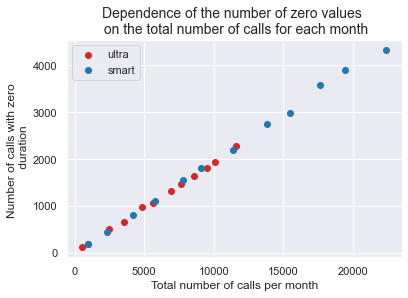

In [28]:
df_users_calls.loc[df_users_calls['duration'] == 0, 'nulls_count'] = 1

null_calls_ultra = df_users_calls.loc[df_users_calls['tariff']=='ultra'].pivot_table(index='month', values=['id', 'nulls_count'], aggfunc='count')
null_calls_smart = df_users_calls.loc[df_users_calls['tariff']=='smart'].pivot_table(index='month', values=['id', 'nulls_count'], aggfunc='count')

plt.scatter(x='id', y='nulls_count', data=null_calls_ultra, color='tab:red')
plt.scatter(x='id', y='nulls_count', data=null_calls_smart, color='tab:blue')

plt.legend(loc='lower right')
plt.legend(['ultra', 'smart'])
plt.title('Dependence of the number of zero values \n on the total number of calls for each month', fontsize=14);
plt.xlabel('Total number of calls per month', fontsize=12)
plt.ylabel('Number of calls with zero \n duration', fontsize=12);

The graph shows that the ratio of calls with zero duration to the total number of calls per month is constant. The dependence for both tariffs is the same

Calls with zero duration are missed or dropped calls.

#### Number of messages sent by month

In [29]:
df_users_messages['month'] = df_users_messages['message_date'].dt.month

In [30]:
df_users_messages_agg = df_users_messages.pivot_table(index=['user_id','month','tariff'], values='id', aggfunc='count').rename(columns={'id': 'count_messages'})

In [31]:
df_users_messages_agg.head(10)

count_messages
user_id month tariff                
1000    5     ultra               22
        6     ultra               60
        7     ultra               75
        8     ultra               81
        9     ultra               57
        10    ultra               73
        11    ultra               58
        12    ultra               70
1002    6     smart                4
        7     smart               11

#### The amount of Internet traffic used by months

In [32]:
df_users_internet['month'] = df_users_internet['session_date'].dt.month

In [33]:
df_users_internet_agg = df_users_internet.pivot_table(index=['user_id','month', 'tariff'], values='mb_used', aggfunc='sum')

In [34]:
df_users_internet_agg

mb_used
user_id month tariff          
1000    5     ultra    2253.49
        6     ultra   23233.77
        7     ultra   14003.64
        8     ultra   14055.93
        9     ultra   14568.91
...                        ...
1498    10    smart   20579.36
1499    9     smart    1845.75
        10    smart   17788.51
        11    smart   17963.31
        12    smart   13055.58

[3203 rows x 1 columns]

**Plot of the number of zero indicators depending on the number of Internet sessions for each month:**

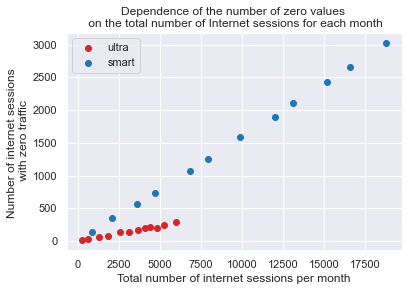

In [35]:

df_users_internet.loc[df_users_internet['mb_used'] == 0, 'nulls_count'] = 1
null_mb = df_users_internet.pivot_table(index='month', values=['id', 'nulls_count'], aggfunc='count')

null_internet_ultra = df_users_internet.loc[df_users_internet['tariff']=='ultra'].pivot_table(index='month', values=['id', 'nulls_count'], aggfunc='count')
null_internet_smart = df_users_internet.loc[df_users_internet['tariff']=='smart'].pivot_table(index='month', values=['id', 'nulls_count'], aggfunc='count')

plt.scatter(x='id', y='nulls_count', data=null_internet_ultra, color='tab:red')
plt.scatter(x='id', y='nulls_count', data=null_internet_smart, color='tab:blue')

plt.legend(loc='lower right')
plt.legend(['ultra', 'smart'])
plt.xlabel('Total number of internet sessions per month')
plt.ylabel('Number of internet sessions \n with zero traffic')
_ = plt.title('Dependence of the number of zero values \n on the total number of Internet sessions for each month')

Here, as well as with the duration of calls, there is a linear dependence of zero Internet sessions on their total number. However, the dependencies are different. At the Ultra tariff, the share of zero Internet sessions is much less. It can be assumed that a null session is a network login using anonymous authentication.

**Get rid of zero values in the sample so as not to distort the calculation of statistics in the future:**

In [36]:
df_users_calls = df_users_calls.loc[df_users_calls['duration'] != 0]
df_users_internet = df_users_internet.loc[df_users_internet['mb_used'] != 0]

In [37]:
df_users_internet

,Unnamed: 0,id,mb_used,session_date,age,churn_date,city,first_name,last_name,reg_date,tariff,month,nulls_count
user_id,,,,,,,,,,,,,
1000,0,1000_0,112.95,2018-11-25,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11,NaN
1000,1,1000_1,1052.81,2018-09-07,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,NaN
1000,2,1000_2,1197.26,2018-06-25,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,NaN
1000,3,1000_3,550.27,2018-08-22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,NaN
1000,4,1000_4,302.56,2018-09-24,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,149390,1499_151,752.72,2018-10-11,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10,NaN
1499,149391,1499_152,318.90,2018-10-03,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10,NaN
1499,149392,1499_153,490.13,2018-12-14,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,12,NaN


In [38]:
df_users_internet_agg.columns = [''.join(col).strip() for col in df_users_internet_agg.columns.values]

Rounding up web traffic for each month and converting from mb to GB:

In [39]:
def math_ceil(x):
    try:
        return math.ceil(x / 1024)
    except:
        return np.nan

In [40]:
df_users_internet_agg['gb_used'] = df_users_internet_agg['mb_used'].apply(
    lambda x: math_ceil(x))

In [41]:
df_users_internet_agg

mb_used  gb_used
user_id month tariff                   
1000    5     ultra    2253.49        3
        6     ultra   23233.77       23
        7     ultra   14003.64       14
        8     ultra   14055.93       14
        9     ultra   14568.91       15
...                        ...      ...
1498    10    smart   20579.36       21
1499    9     smart    1845.75        2
        10    smart   17788.51       18
        11    smart   17963.31       18
        12    smart   13055.58       13

[3203 rows x 2 columns]

#### Calculation of monthly revenue for each tariff

Tariff "Smart"
- Monthly fee: 550 rubles
- Included 500 minutes of calls, 50 messages and 15 GB of internet traffic
- The cost of services in excess of the tariff package: 1. minute of conversation: 3 rubles ("Megaline" always rounds up the values of minutes and megabytes. If the user spoke only 1 second, a whole minute is counted in the tariff); 2. message: 3 rubles; 3. 1 GB of Internet traffic: 200 rubles.

Tariff "Ultra"
- Monthly fee: 1950 rubles
- Included 3000 minutes of calls, 1000 messages and 30 GB of internet traffic
- Cost of services in excess of the tariff package: 1. minute of conversation: 1 ruble; 2. message: 1 ruble; 3. 1 GB of Internet traffic: 150 rubles.

In [42]:
df_general_agg = df_users_calls_agg.join([df_users_messages_agg, df_users_internet_agg], how='outer').reset_index()

In [43]:
df_general_agg.head(10)

,user_id,month,tariff,count_calls,dur_calls,count_messages,mb_used,gb_used
0,1000,5,ultra,22.0,159.0,22.0,2253.49,3.0
1,1000,6,ultra,43.0,172.0,60.0,23233.77,23.0
2,1000,7,ultra,47.0,340.0,75.0,14003.64,14.0
3,1000,8,ultra,52.0,408.0,81.0,14055.93,14.0
4,1000,9,ultra,58.0,466.0,57.0,14568.91,15.0
5,1000,10,ultra,57.0,350.0,73.0,14702.49,15.0
6,1000,11,ultra,43.0,338.0,58.0,14756.47,15.0
7,1000,12,ultra,46.0,333.0,70.0,9817.61,10.0
8,1001,11,smart,59.0,430.0,NaN,18429.34,18.0
9,1001,12,smart,63.0,414.0,NaN,14036.66,14.0


In [44]:
df_general_agg = df_general_agg.merge(df_tariffs, left_on='tariff', right_on='tariff_name')

In [45]:
df_general_agg = df_general_agg.set_index('user_id').join(df_users[['city', 'user_id']].set_index('user_id'))

In [46]:
df_general_agg.head(10)

,month,tariff,count_calls,dur_calls,count_messages,mb_used,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,city
user_id,,,,,,,,,,,,,,,,,
1000,5,ultra,22.0,159.0,22.0,2253.49,3.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар
1000,6,ultra,43.0,172.0,60.0,23233.77,23.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар
1000,7,ultra,47.0,340.0,75.0,14003.64,14.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар
1000,8,ultra,52.0,408.0,81.0,14055.93,14.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар
1000,9,ultra,58.0,466.0,57.0,14568.91,15.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар
1000,10,ultra,57.0,350.0,73.0,14702.49,15.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар
1000,11,ultra,43.0,338.0,58.0,14756.47,15.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар
1000,12,ultra,46.0,333.0,70.0,9817.61,10.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар
1001,11,smart,59.0,430.0,NaN,18429.34,18.0,50,15360,500,550,200,3,3,smart,15.0,Москва


In [47]:
df_general_agg.isna().sum()

month                      0
tariff                     0
count_calls               40
dur_calls                 40
count_messages           497
mb_used                   11
gb_used                   11
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
tariff_name                0
gb_per_month_included      0
city                       0
dtype: int64

In [48]:
df_general_agg = df_general_agg.fillna(0)

In [49]:
%%timeit
def proceeds_calls(dur_calls, minutes_included, rub_monthly_fee, rub_per_minute):
    if dur_calls <= minutes_included:
        return rub_monthly_fee
    else:
        return rub_monthly_fee + (dur_calls - minutes_included) * rub_per_minute

def proceeds_message(count_messages, messages_included, rub_per_message):
    if count_messages <= messages_included:
        return 0
    else:
        return (count_messages - messages_included) * rub_per_message    

def proceeds_traffic(gb_used, gb_per_month_included, rub_per_gb):
    if gb_used <= gb_per_month_included:
        return 0
    else:
        return (gb_used - gb_per_month_included) * rub_per_gb

df_general_agg['revenue'] = df_general_agg.apply(
    lambda row: proceeds_calls(
        row['dur_calls'], 
        row['minutes_included'], 
        row['rub_monthly_fee'], 
        row['rub_per_minute']), axis=1) + df_general_agg.apply(
    lambda row: proceeds_message(
        row['count_messages'], 
        row['messages_included'], 
        row['rub_per_message']), axis=1) + df_general_agg.apply(
    lambda row: proceeds_traffic(
        row['gb_used'], 
        row['gb_per_month_included'], 
        row['rub_per_gb']), axis=1)

90.3 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [50]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


In [51]:
df_general_agg.head(10)

,month,tariff,count_calls,dur_calls,count_messages,mb_used,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,city,revenue
user_id,,,,,,,,,,,,,,,,,,
1000,5,ultra,22.0,159.0,22.0,2253.49,3.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар,1950.0
1000,6,ultra,43.0,172.0,60.0,23233.77,23.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар,1950.0
1000,7,ultra,47.0,340.0,75.0,14003.64,14.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар,1950.0
1000,8,ultra,52.0,408.0,81.0,14055.93,14.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар,1950.0
1000,9,ultra,58.0,466.0,57.0,14568.91,15.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар,1950.0
1000,10,ultra,57.0,350.0,73.0,14702.49,15.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар,1950.0
1000,11,ultra,43.0,338.0,58.0,14756.47,15.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар,1950.0
1000,12,ultra,46.0,333.0,70.0,9817.61,10.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар,1950.0
1001,11,smart,59.0,430.0,0.0,18429.34,18.0,50,15360,500,550,200,3,3,smart,15.0,Москва,1150.0


### Step 3. Data analysis

####  Graphs of average values by months for each of the parameters:

In [52]:
def barplot_style(x,y,z):
    x.plot(kind='bar', figsize=(12, 5)).set_title(z, fontsize=14)
    plt.xlabel(y, fontsize=12)
    plt.ylabel('Values', fontsize=12)

In [53]:
df_dur_calls_smart = df_general_agg[df_general_agg['tariff_name'] == 'smart'].pivot_table(index='month', values='dur_calls')

In [54]:
df_dur_calls_ultra = df_general_agg[df_general_agg['tariff_name'] == 'ultra'].pivot_table(index='month', values='dur_calls')

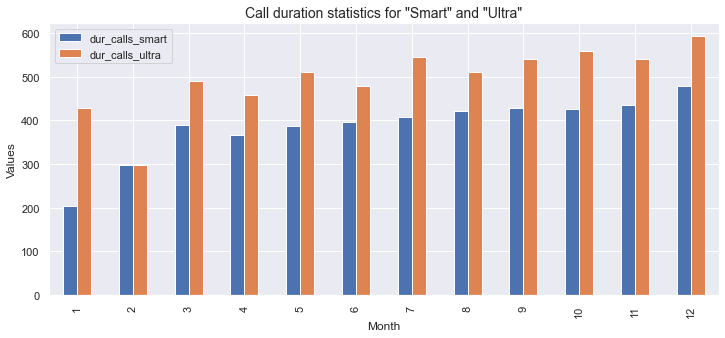

In [55]:
barplot_style(df_dur_calls_smart.join(df_dur_calls_ultra, how='outer', lsuffix='_smart', rsuffix='_ultra'),'Month','Call duration statistics for "Smart" and "Ultra"')

The average duration of calls by months shows a symmetrical growth up to certain values. The `Smart` tariff has increased the average duration of calls to 450 minutes, the `Ultra` tariff has grown to 550 minutes. Despite the fact that the `Ultra` tariff has a duration limit of 3000 minutes, there is no trend towards significant further growth.

In [56]:
df_count_mess_smart = df_general_agg[df_general_agg['tariff_name'] == 'smart'].pivot_table(index='month', values='count_messages')

In [57]:
df_count_mess_ultra = df_general_agg[df_general_agg['tariff_name'] == 'ultra'].pivot_table(index='month', values='count_messages')

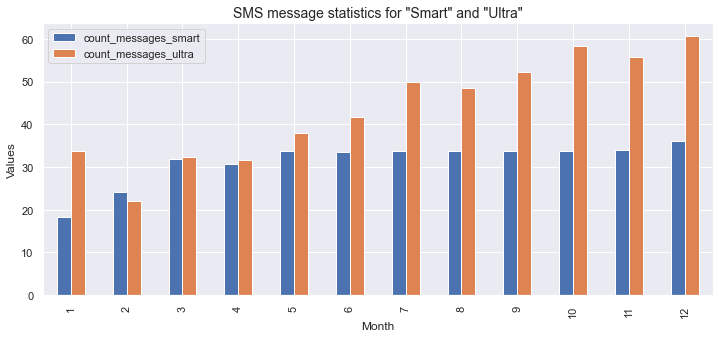

In [58]:
barplot_style(df_count_mess_smart.join(df_count_mess_ultra, how='outer', lsuffix='_smart', rsuffix='_ultra'),'Month','SMS message statistics for "Smart" and "Ultra"')

The `Smart` tariff shows an increase in the number of messages to 40. Clients on average do not use the entire supply of SMS messages. On the `Ultra` tariff, the average number of SMS messages per month is growing steadily and reaches 70. Since the limit on this tariff is 1000 SMS messages, the growth will most likely continue in the future.

In [59]:
df_count_traff_smart = df_general_agg[df_general_agg['tariff_name'] == 'smart'].pivot_table(index='month', values='gb_used')

In [60]:
df_count_traff_ultra = df_general_agg[df_general_agg['tariff_name'] == 'ultra'].pivot_table(index='month', values='gb_used')

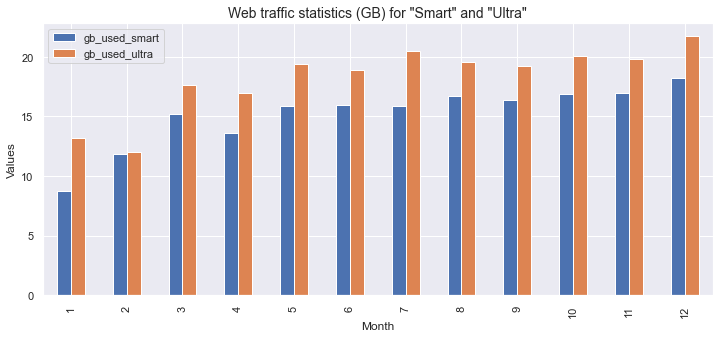

In [61]:
barplot_style(df_count_traff_smart.join(df_count_traff_ultra, how='outer', lsuffix='_smart', rsuffix='_ultra'),'Month','Web traffic statistics (GB) for "Smart" and "Ultra"')

This graph demonstrates the symmetrical growth of web traffic for both tariffs. Despite the fact that the `Ultra` tariff provides 30GB of Internet traffic, few people use it completely. On average, the `Ultra` tariff consumes about 20GB of traffic.

In [62]:
df_general_agg[df_general_agg['tariff_name'] == 'smart']

,month,tariff,count_calls,dur_calls,count_messages,mb_used,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,city,revenue
user_id,,,,,,,,,,,,,,,,,,
1001,11,smart,59.0,430.0,0.0,18429.34,18.0,50,15360,500,550,200,3,3,smart,15.0,Москва,1150.0
1001,12,smart,63.0,414.0,0.0,14036.66,14.0,50,15360,500,550,200,3,3,smart,15.0,Москва,550.0
1002,6,smart,15.0,117.0,4.0,10856.82,11.0,50,15360,500,550,200,3,3,smart,15.0,Стерлитамак,550.0
1002,7,smart,26.0,214.0,11.0,17580.10,18.0,50,15360,500,550,200,3,3,smart,15.0,Стерлитамак,1150.0
1002,8,smart,42.0,289.0,13.0,20319.26,20.0,50,15360,500,550,200,3,3,smart,15.0,Стерлитамак,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,10,smart,41.0,247.0,42.0,20579.36,21.0,50,15360,500,550,200,3,3,smart,15.0,Владикавказ,1750.0
1499,9,smart,9.0,70.0,11.0,1845.75,2.0,50,15360,500,550,200,3,3,smart,15.0,Пермь,550.0
1499,10,smart,68.0,449.0,48.0,17788.51,18.0,50,15360,500,550,200,3,3,smart,15.0,Пермь,1150.0


In [63]:
df_proceeds_smart = df_general_agg[df_general_agg['tariff_name'] == 'smart'].pivot_table(
    index='month', values='revenue')

In [64]:
df_proceeds_ultra = df_general_agg[df_general_agg['tariff_name'] == 'ultra'].pivot_table(index='month', values='revenue')

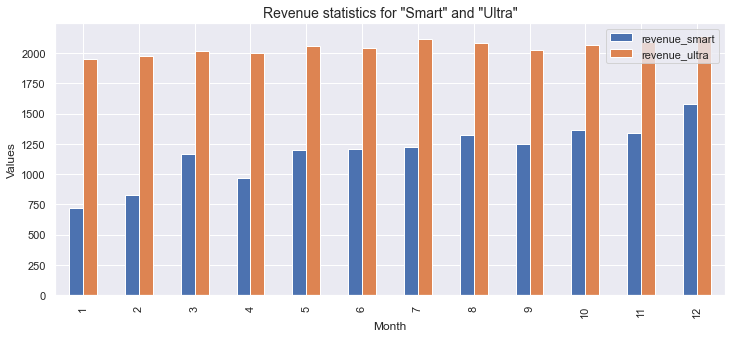

In [65]:
barplot_style(df_proceeds_smart.join(df_proceeds_ultra, how='outer', lsuffix='_smart', rsuffix='_ultra'),'Month','Revenue statistics for "Smart" and "Ultra"')

The graph shows a stable growth of `Smart` tariff revenue, while `Ultra` tariff revenue does not change.

#### Distribution schedules for each tariff parameter (parameter as a random variable)

C:\Users\Vadim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vadim\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


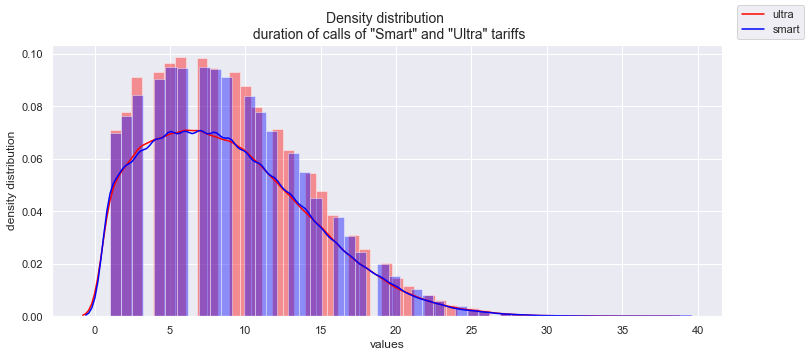

In [95]:
fig = plt.figure(figsize=(12,5))

sns.distplot(a=df_users_calls.loc[df_users_calls['tariff']=='ultra','duration'], 
             bins=50, hist=True, color='red')
sns.distplot(a=df_users_calls.loc[df_users_calls['tariff']=='smart','duration'], 
             bins=50, hist=True, color='blue')

fig.legend(labels=['ultra','smart'])
plt.title('Density distribution \n duration of calls of "Smart" and "Ultra" tariffs', fontsize=14);
plt.xlabel('values', fontsize=12)
plt.ylabel('density distribution', fontsize=12)

plt.show()



The plots show a symmetrical normal distribution. The most frequent calls are about 6 minutes long.

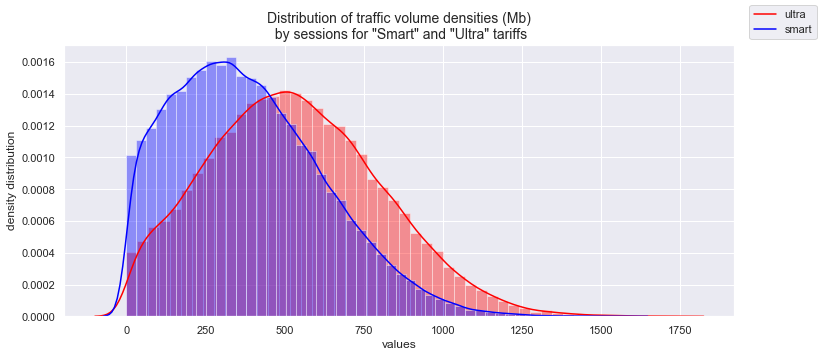

In [102]:
fig = plt.figure(figsize=(12,5))

sns.distplot(a=df_users_internet.loc[df_users_internet['tariff']=='ultra','mb_used'], 
             bins=50, hist=True, color='red')
sns.distplot(a=df_users_internet.loc[df_users_internet['tariff']=='smart','mb_used'], 
             bins=50, hist=True, color='blue')

fig.legend(labels=['ultra','smart'])
plt.title('Distribution of traffic volume densities (Mb)\n by sessions for "Smart" and "Ultra" tariffs', fontsize=14);
plt.xlabel('values', fontsize=12)
plt.ylabel('density distribution', fontsize=12)

plt.show()

The graph looks like a normal distribution. Tariff `Ultra` shows more traffic consumption. Average around 500MB. For the `Smart` tariff, the average value is about 300MB per session. The `Ultra` tariff is generally characterized by a greater consumption of traffic. This is logical based on the conditions of both tariffs.

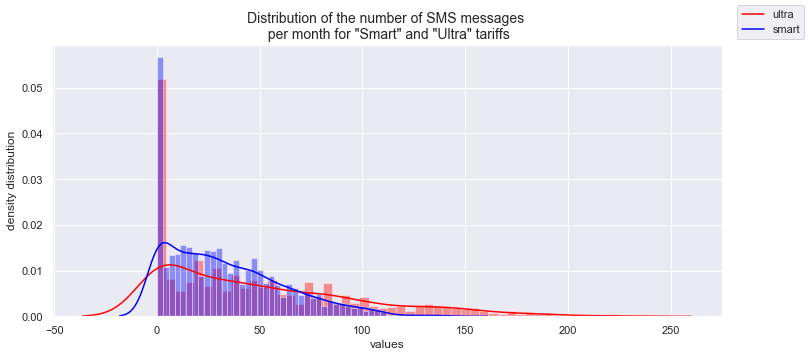

In [101]:
fig = plt.figure(figsize=(12,5))

sns.distplot(df_general_agg.loc[df_general_agg['tariff_name'] == 'ultra', 'count_messages'], 
             bins=50, hist=True, color='red')
sns.distplot(df_general_agg.loc[df_general_agg['tariff_name'] == 'smart', 'count_messages'], 
             bins=50, hist=True, color='blue')

fig.legend(labels=['ultra','smart'])
plt.title('Distribution of the number of SMS messages \n per month for "Smart" and "Ultra" tariffs', fontsize=14);
plt.xlabel('values', fontsize=12)
plt.ylabel('density distribution', fontsize=12)

plt.show()

The most frequent number of messages sent monthly is in the range of 20-25. A little less than 1 post per day. This situation is typical for both tariffs.

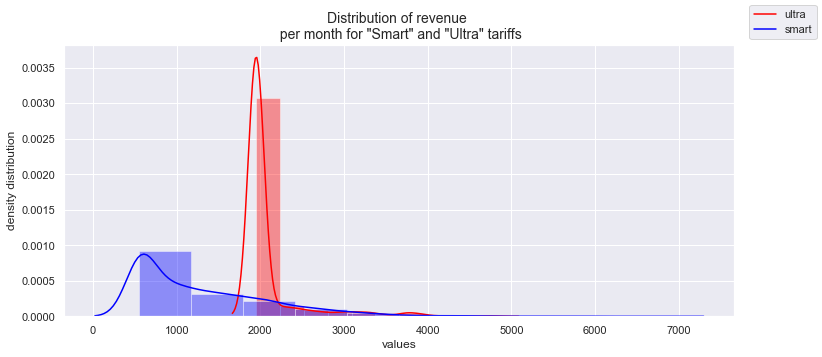

In [103]:
fig = plt.figure(figsize=(12,5))

sns.distplot(a=df_general_agg.loc[df_general_agg['tariff_name'] == 'ultra', 'revenue'], 
             bins=10, hist=True, color='red')
sns.distplot(a=df_general_agg.loc[df_general_agg['tariff_name'] == 'smart', 'revenue'], 
             bins=10, hist=True, color='blue')

fig.legend(labels=['ultra','smart'])
plt.title('Distribution of revenue \n per month for "Smart" and "Ultra" tariffs', fontsize=14);
plt.xlabel('values', fontsize=12)
plt.ylabel('density distribution', fontsize=12)

plt.show()

The most frequent values are close to the values of the subscription fee. This is true for both tariffs. Large values tend to zero.

#### Calculation of the mean, variance and standard deviation for each tariff parameter

Let's calculate the mathematical expectation, variance and standard deviation for each random variable from the sample. The mathematical expectation is equal to the mean if the outcomes are equally likely. We will assume that the probability of getting different values for such parameters as the duration of calls, the number of messages and the amount of traffic is the same.

In [70]:
df_general_agg.head(2)

,month,tariff,count_calls,dur_calls,count_messages,mb_used,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,city,revenue
user_id,,,,,,,,,,,,,,,,,,
1000,5,ultra,22.0,159.0,22.0,2253.49,3.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар,1950.0
1000,6,ultra,43.0,172.0,60.0,23233.77,23.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар,1950.0


In [71]:
np.var(df_general_agg['dur_calls'], ddof=1)

58520.437687610414

In [72]:
np.var(df_general_agg['dur_calls'])

58502.22971073188

In [73]:
df_general_agg

,month,tariff,count_calls,dur_calls,count_messages,mb_used,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,city,revenue
user_id,,,,,,,,,,,,,,,,,,
1000,5,ultra,22.0,159.0,22.0,2253.49,3.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар,1950.0
1000,6,ultra,43.0,172.0,60.0,23233.77,23.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар,1950.0
1000,7,ultra,47.0,340.0,75.0,14003.64,14.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар,1950.0
1000,8,ultra,52.0,408.0,81.0,14055.93,14.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар,1950.0
1000,9,ultra,58.0,466.0,57.0,14568.91,15.0,1000,30720,3000,1950,150,1,1,ultra,30.0,Краснодар,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,10,smart,41.0,247.0,42.0,20579.36,21.0,50,15360,500,550,200,3,3,smart,15.0,Владикавказ,1750.0
1499,9,smart,9.0,70.0,11.0,1845.75,2.0,50,15360,500,550,200,3,3,smart,15.0,Пермь,550.0
1499,10,smart,68.0,449.0,48.0,17788.51,18.0,50,15360,500,550,200,3,3,smart,15.0,Пермь,1150.0


In [74]:
np.var(df_general_agg.loc[df_general_agg['tariff_name'] == 'ultra']['dur_calls'])

100771.22361720214

In [75]:
np.var(df_general_agg.loc[df_general_agg['tariff_name'] == 'ultra']['dur_calls'], ddof=1)

100873.63339730092

**Calculation of the mean, variance and standard deviation for the Ultra tariff:**

In [76]:
df_general_agg.loc[df_general_agg['tariff_name'] == 'ultra'].agg({'dur_calls' : ['mean', 'var', 'std'], 
                    'count_messages': ['mean', 'var', 'std'], 
                    'gb_used': ['mean', 'var', 'std'], 
                    'revenue': ['mean', 'var', 'std']}).round()

,dur_calls,count_messages,gb_used,revenue
mean,527.0,49.0,19.0,2070.0
var,100874.0,2285.0,97.0,141517.0
std,318.0,48.0,10.0,376.0


**Calculation of mean, variance and standard deviation for the Smart tariff:**

In [77]:
df_general_agg.loc[df_general_agg['tariff_name'] == 'smart'].agg({'dur_calls' : ['mean', 'var', 'std'], 
                    'count_messages': ['mean', 'var', 'std'], 
                    'gb_used': ['mean', 'var', 'std'], 
                    'revenue': ['mean', 'var', 'std']}).round()

,dur_calls,count_messages,gb_used,revenue
mean,418.0,33.0,16.0,1290.0
var,36219.0,797.0,33.0,669786.0
std,190.0,28.0,6.0,818.0


### Step 4. Hypothesis testing

#### Testing the 1st hypothesis: the average revenue of users of the Ultra and Smart tariffs are different

H0 — the average revenue of Ultra tariff users is equal to the average revenue of Smart tariff users.

H1 - the average revenue of users of the "Ultra" and "Smart" tariffs are different.

α=1%

In [78]:
alpha = .01

results = st.ttest_ind(df_general_agg.loc[df_general_agg['tariff_name'] == 'ultra', 'revenue'],
                       df_general_agg.loc[df_general_agg['tariff_name'] == 'smart', 'revenue'],
                       equal_var=False,
                       nan_policy='omit')


In [79]:
results.pvalue

4.2606313931076085e-250

In [104]:
if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Failed to reject the null hypothesis


In [81]:
df_general_agg.pivot_table(index='tariff_name', values='revenue', aggfunc='median')

,revenue
tariff_name,
smart,1023.0
ultra,1950.0


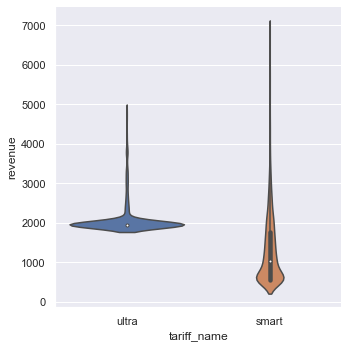

In [82]:
_ = sns.catplot(x="tariff_name", y='revenue', kind="violin", data=df_general_agg, orient='v')

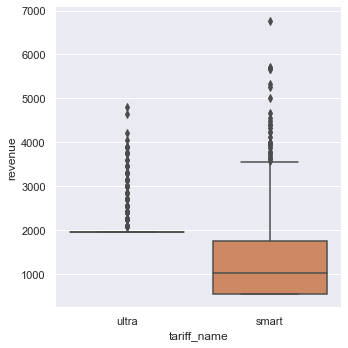

In [83]:
_ = sns.catplot(x="tariff_name", y='revenue', kind="box", data=df_general_agg, orient='v')

Almost all Ultra tariff revenue values are equal to 1950, while 25% of Smart tariff revenue values are almost twice as much. The median revenue value of the Smart tariff is two times less (1000 versus 1950).
This suggests that the user of the Smart tariff does not have enough tariff package, as a result, he pays extra for additional services. The user of the Ultra tariff, on the contrary, almost always fits into the tariff plan and does not overpay for using services in excess of the tariff plan.

#### Testing the 2nd hypothesis: the average revenue of users from Moscow differs from the revenue of users from other regions.


H0 — the average revenue of users from Moscow is equal to the average revenue of users from other regions.

H1 — the average revenue of users from Moscow differs from the average revenue of users from other regions.

α=1%

In [105]:
alpha = .01

results = st.ttest_ind(df_general_agg.loc[df_general_agg['city'] == 'Москва', 'revenue'],
                       df_general_agg.loc[df_general_agg['tariff_name'] != 'Москва', 'revenue'],
                       equal_var=False,
                       nan_policy='omit')

In [106]:
results.pvalue

0.5989670526299272

In [107]:
if results.pvalue < alpha:
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

Failed to reject the null hypothesis


In [108]:
def det_region(city):
    if city == 'Москва': return 'Москва'
    else: return 'Other city'
    
df_general_agg['cat_city'] = df_general_agg['city'].apply(det_region)

In [109]:
df_general_agg.pivot_table(index='cat_city', values='revenue', aggfunc='median')

,revenue
cat_city,
Other city,1583.0
Москва,1750.0


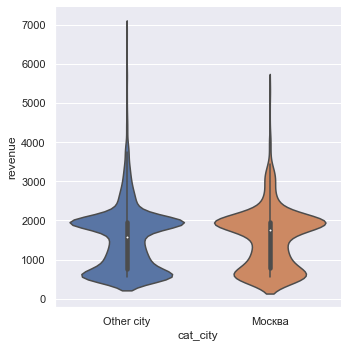

In [110]:
_ = sns.catplot(x='cat_city', y='revenue', kind="violin", data=df_general_agg, orient='v')

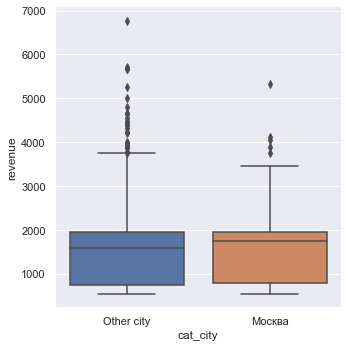

In [111]:
_ = sns.catplot(x='cat_city', y='revenue', kind="box", data=df_general_agg, orient='v')

The average revenue from users from Moscow is almost the same as from users from other regions. The null hypothesis is confirmed.

### Step 5. Conclusions

In accordance with the statistical analysis of this sample, the revenue for the Ultra tariff is greater than for Smart. On average, the revenue from one user of the Ultra tariff per month is 1950 rubles, from one user of the Smart tariff - 1023 rubles. It turns out the tariff "Ultra" is more profitable for the company "Megaline".

- Smart tariff users lack services within the tariff package: in addition to the subscription fee, users on average pay another 473 rubles monthly (+86%).
- Users of the "Ultra" tariff, on the contrary, do not use the tariff package in full.
- Average revenues from users in Moscow do not differ from revenues in other cities: the difference is statistically insignificant (p-value: 0.59) and amounts to 167 rubles: 1750 rubles. in Moscow against 1583 rubles in other cities.